In [266]:
%load_ext watermark
%watermark  -d -u -a 'Prasad Bhoite. Homework3_CAP5768_TimeSeriesAnalysis_EveryHour' -v -p numpy,scipy,matplotlib,sklearn,pandas

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Prasad Bhoite. Homework3_CAP5768_TimeSeriesAnalysis 
last updated: 2019-11-17 

CPython 3.7.3
IPython 7.6.1

numpy 1.17.3
scipy 1.3.0
matplotlib 3.1.0
sklearn 0.21.2
pandas 0.24.2


In [267]:
## Import the libraries
import pandas as pd
import numpy as np
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib


matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [268]:
## Import the dataset
df = pd.read_excel("AirQualityUCI.xlsx")
df

## Info
df.info()


## Let's look at the minimum and maximum dates 
df['Date'].min(), df['Date'].max()

## Let's look at the column names
df.columns
## Let's remove the unwanted columns
cols = ['PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH']

df.drop(cols, axis=1, inplace=True)

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
Date             9357 non-null datetime64[ns]
Time             9357 non-null object
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null int64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
dtypes: datetime64[ns](1), float64(12), int64(1), object(1)
memory usage: 1.1+ MB


,Date,Time,CO(GT)
0,2004-03-10,18:00:00,2.6
1,2004-03-10,19:00:00,2.0
2,2004-03-10,20:00:00,2.2
3,2004-03-10,21:00:00,2.2
4,2004-03-10,22:00:00,1.6
5,2004-03-10,23:00:00,1.2
6,2004-03-11,00:00:00,1.2
7,2004-03-11,01:00:00,1.0
8,2004-03-11,02:00:00,0.9
9,2004-03-11,03:00:00,0.6


In [269]:
### Create a new Data_Time Object:
df.loc[:,'Date_Time'] = pd.to_datetime(df.Date.astype(str)+' '+df.Time.astype(str))
df

### Replace -200.0 with Nan and remove the Null values

df.replace(-200.0, np.nan, inplace = True)
df = df.dropna()

df.shape

### Let's check the sum of null values:
df.isnull().sum()

## Sort the dataframe by Date_Time:
df = df.sort_values(by='Date_Time')
df

### Select the important columns:
df=df[['Date_Time','CO(GT)']]
df

,Date_Time,CO(GT)
0,2004-03-10 18:00:00,2.6
1,2004-03-10 19:00:00,2.0
2,2004-03-10 20:00:00,2.2
3,2004-03-10 21:00:00,2.2
4,2004-03-10 22:00:00,1.6
5,2004-03-10 23:00:00,1.2
6,2004-03-11 00:00:00,1.2
7,2004-03-11 01:00:00,1.0
8,2004-03-11 02:00:00,0.9
9,2004-03-11 03:00:00,0.6


In [270]:
## Get the current index of the dataframe:
df.index

## Convert the Date_time object into a series and then set it as an index
datetime = pd.Series(df['Date_Time'])
df.index = datetime

## Drop the Date_Time column after setting an index
df.drop(['Date_Time'], axis=1, inplace=True)

df

,CO(GT)
Date_Time,
2004-03-10 18:00:00,2.6
2004-03-10 19:00:00,2.0
2004-03-10 20:00:00,2.2
2004-03-10 21:00:00,2.2
2004-03-10 22:00:00,1.6
2004-03-10 23:00:00,1.2
2004-03-11 00:00:00,1.2
2004-03-11 01:00:00,1.0
2004-03-11 02:00:00,0.9


In [272]:
#### Let's resample the data by computing the mean of t+k; where k equal to 1 hour, 12 hours, 1 day, 2 days, and 7 days:
#### According to the data description on UCI website, the hourly data is True hourly averaged concentration CO in mg/m^)
#### Therefore, we will use the mean to resample every 12 hours, 1 day, 2 days, and 7 days data.

### Every 12 Hours:
df_12H = df[['CO(GT)']].resample('12H').mean()
df_12H

### Every 1 Day:
df_1Day=df[['CO(GT)']].resample('D').mean()
df_1Day

### Every 2 Days:
df_2Days = df[['CO(GT)']].resample('2D').mean()
df_2Days

### Every 7 Days:
df_7Days = df[['CO(GT)']].resample('7D').mean()
df_7Days

,CO(GT)
Date_Time,
2004-03-10,2.713986
2004-03-17,2.426708
2004-03-24,1.845732
2004-03-31,2.349580
2004-04-07,1.790964
2004-04-14,3.231481
2004-04-21,2.072072
2004-04-28,2.437267
2004-05-05,2.288073


Text(0, 0.5, 'Hourly averaged CO (mg/m^3)')

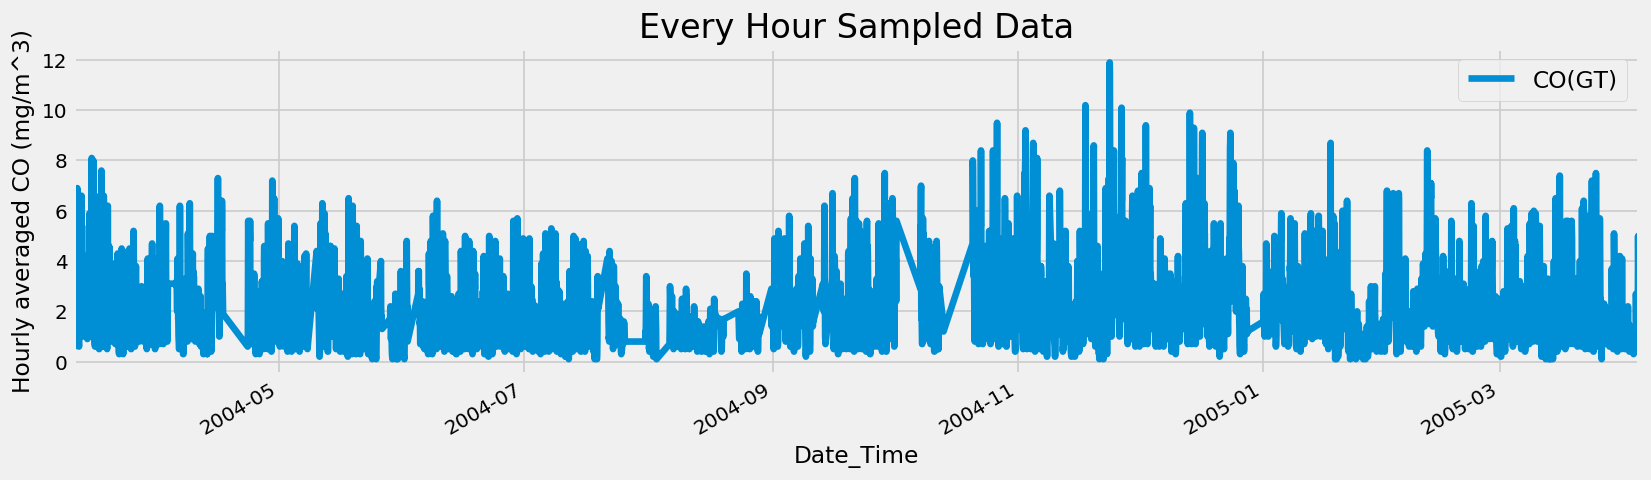

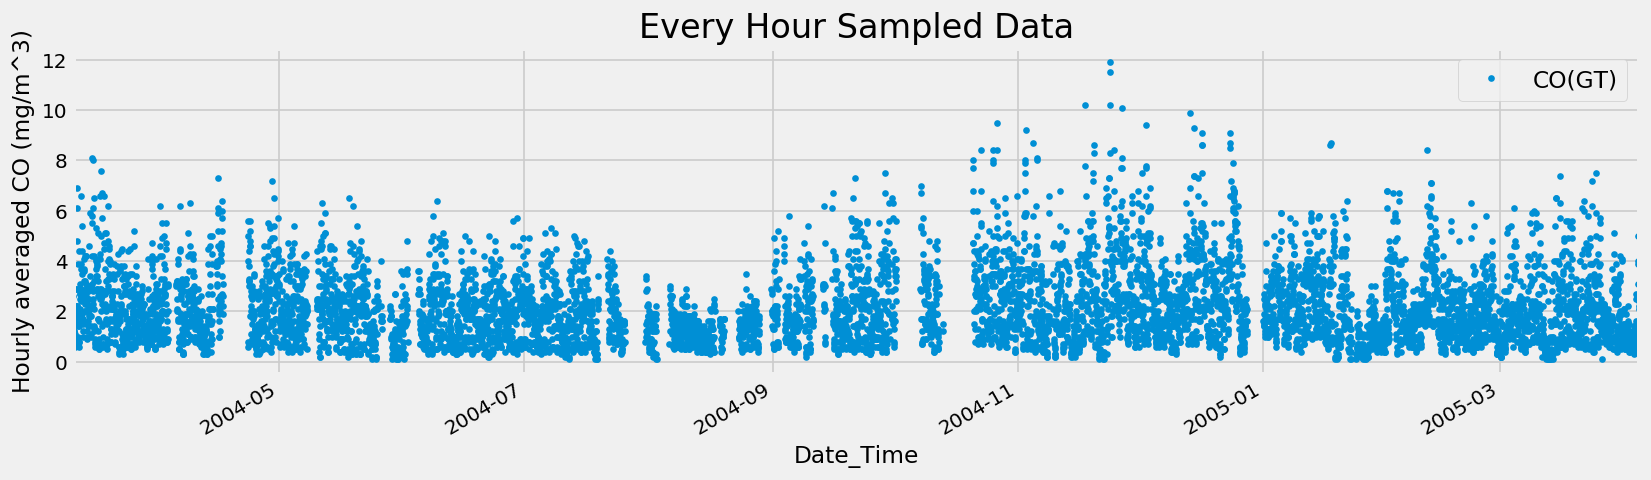

In [281]:
#### Let's plot Every Hour sampled data:

## Figure 1:
df.plot(y=['CO(GT)'],figsize=(15,4))
plt.title("Every Hour Sampled Data")
plt.xlabel("Date_Time")
plt.ylabel("Hourly averaged CO (mg/m^3)")



## Figure 2:
df.plot(y=['CO(GT)'], style='.',figsize=(15,4))
plt.title("Every Hour Sampled Data")
plt.title("Every Hour Sampled Data")
plt.xlabel("Date_Time")
plt.ylabel("Hourly averaged CO (mg/m^3)")

Text(0, 0.5, '12 Hourly averaged CO (mg/m^3)')

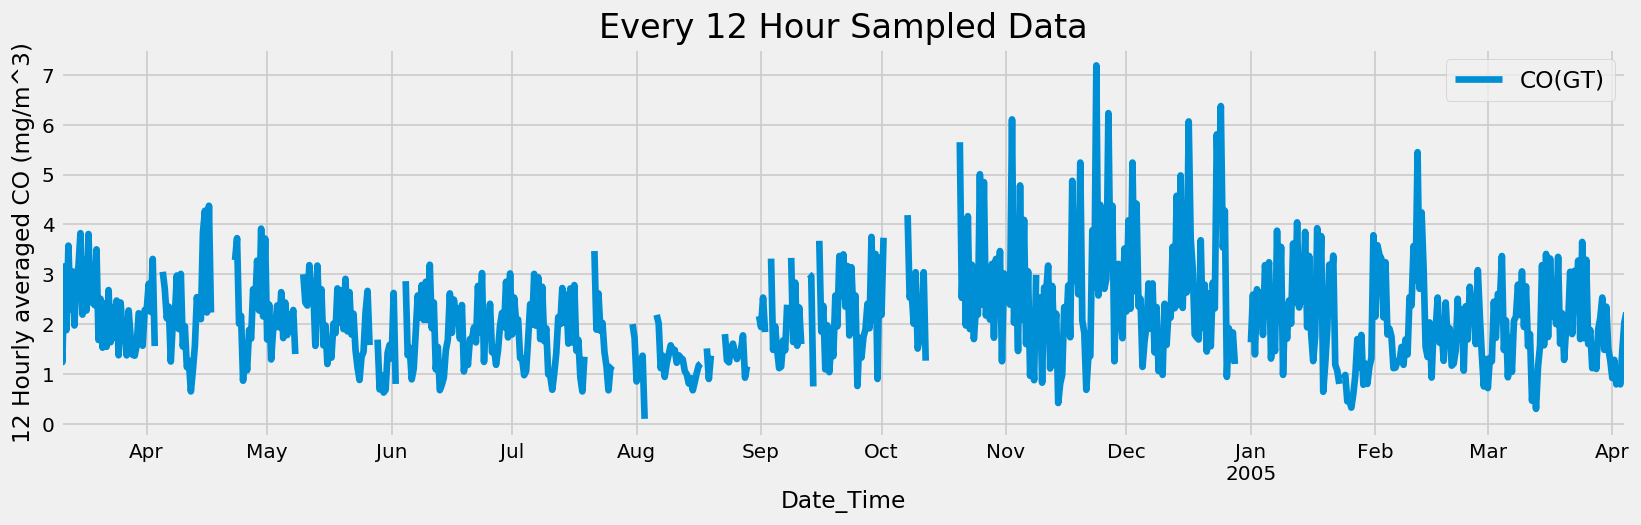

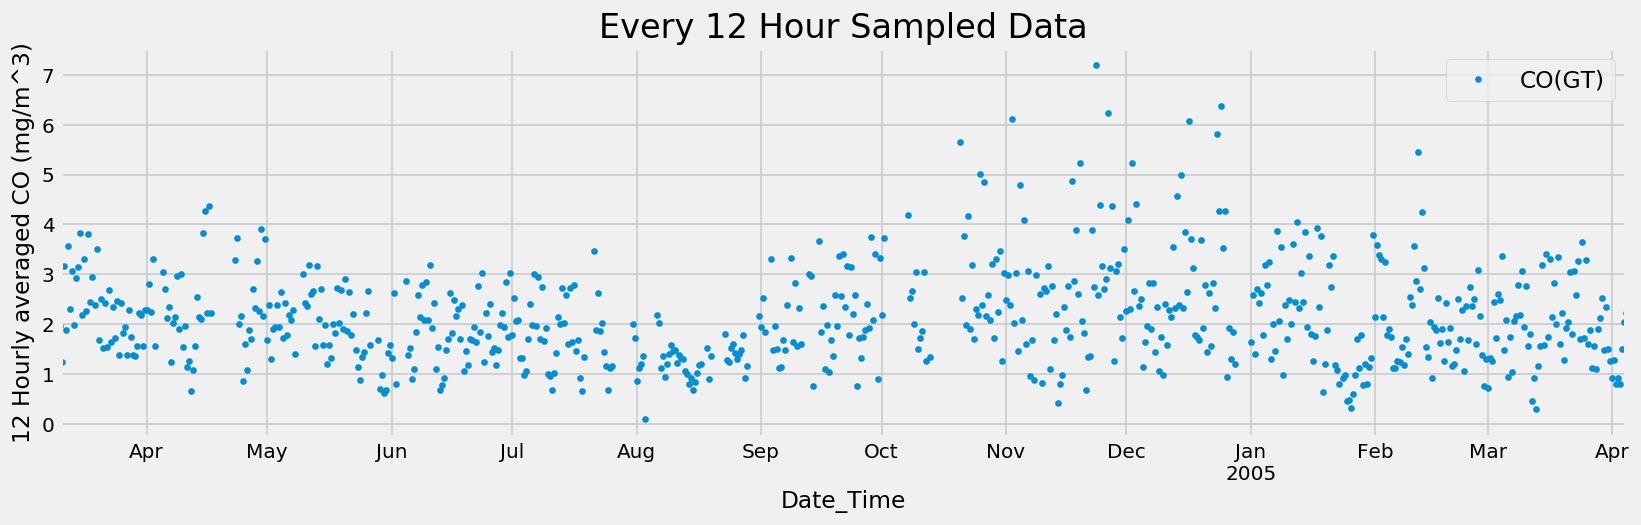

In [283]:
#### Let's plot Every 12 Hour sampled data:

## Figure 1:
df_12H.plot(figsize=(15,4))
plt.title("Every 12 Hour Sampled Data")
plt.title("Every 12 Hour Sampled Data")
plt.xlabel("Date_Time")
plt.ylabel("12 Hourly averaged CO (mg/m^3)")

## Figure 2:
df_12H.plot(y=['CO(GT)'], style='.',figsize=(15,4))
plt.title("Every 12 Hour Sampled Data")
plt.title("Every 12 Hour Sampled Data")
plt.xlabel("Date_Time")
plt.ylabel("12 Hourly averaged CO (mg/m^3)")

Text(0, 0.5, '1 Day averaged CO (mg/m^3)')

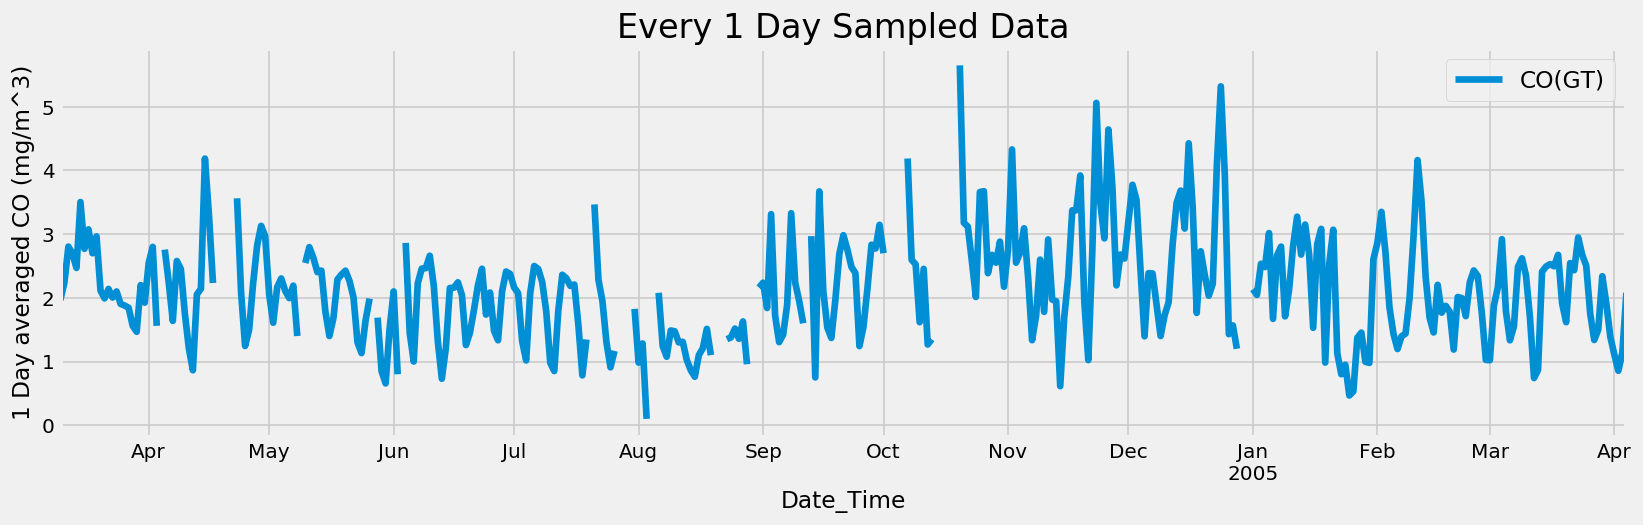

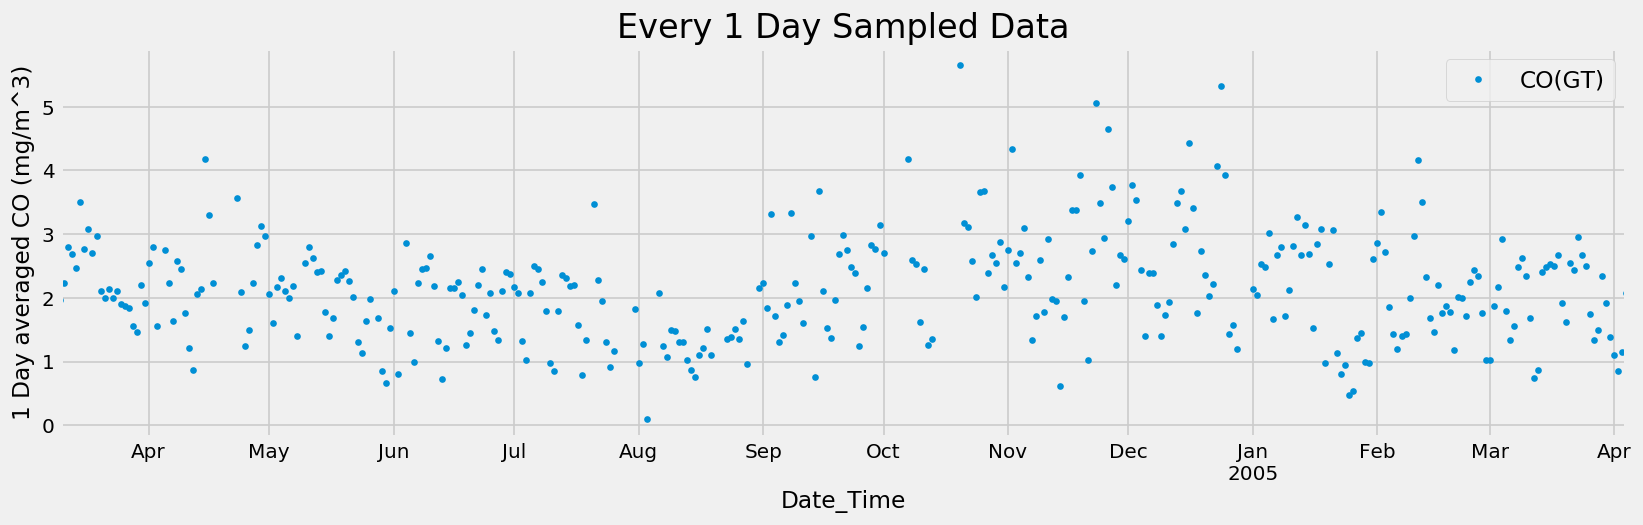

In [284]:
#### Let's plot Every 1 Day sampled data:

## Figure 1:
df_1Day.plot(figsize=(15,4))
plt.title("Every 1 Day Sampled Data")
plt.title("Every 1 Day Sampled Data")
plt.xlabel("Date_Time")
plt.ylabel("1 Day averaged CO (mg/m^3)")

## Figure 2:
df_1Day.plot(y=['CO(GT)'], style='.',figsize=(15,4))
plt.title("Every 1 Day Sampled Data")
plt.title("Every 1 Day Sampled Data")
plt.xlabel("Date_Time")
plt.ylabel("1 Day averaged CO (mg/m^3)")

Text(0, 0.5, '2 Day averaged CO (mg/m^3)')

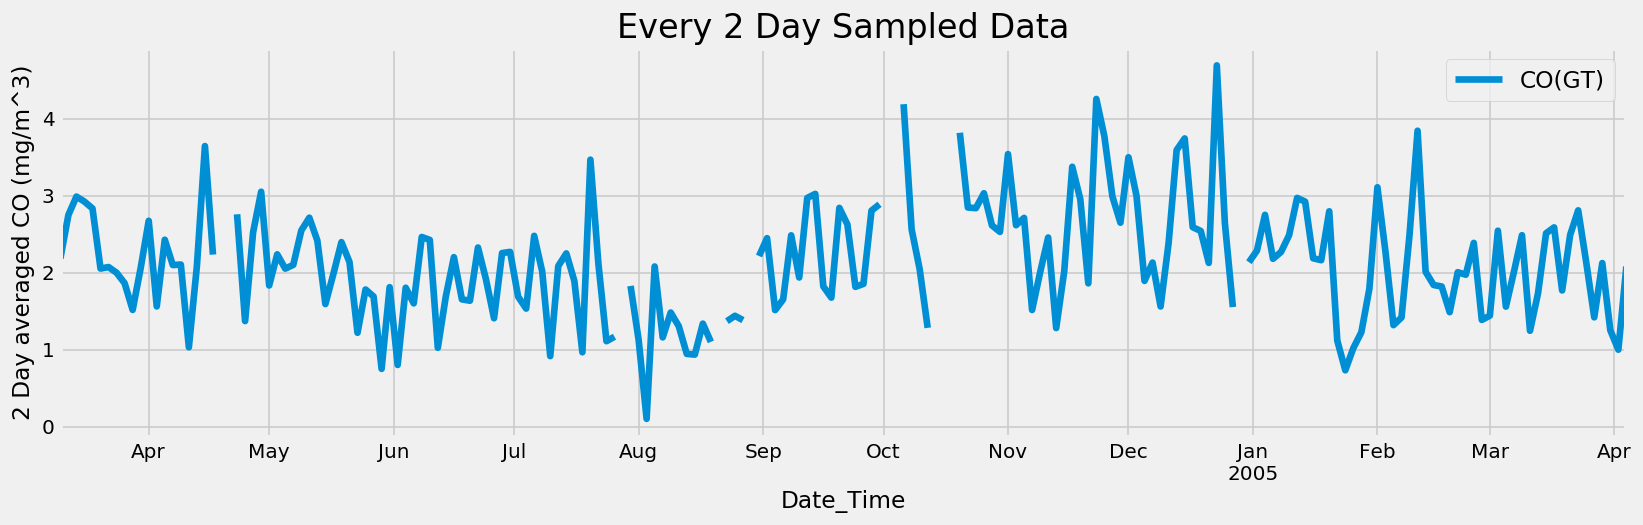

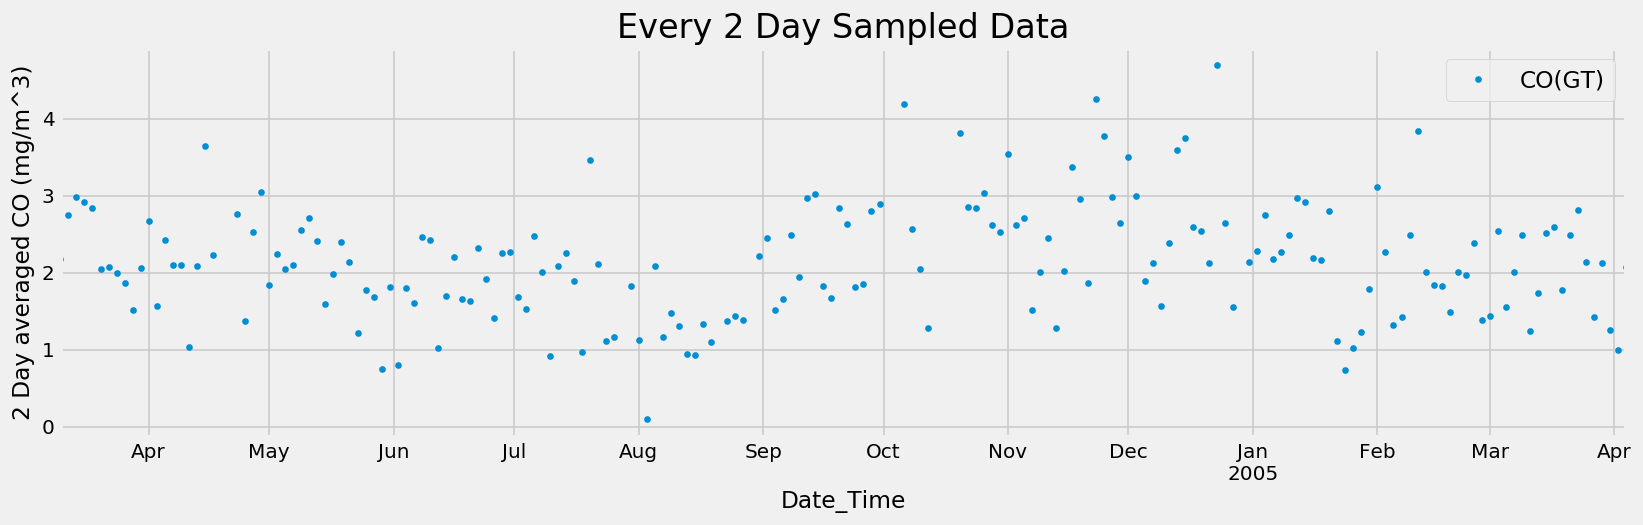

In [285]:
#### Let's plot Every 2 Days sampled data:

## Figure 1:
df_2Days.plot(figsize=(15,4))
plt.title("Every 2 Day Sampled Data")
plt.title("Every 2 Day Sampled Data")
plt.xlabel("Date_Time")
plt.ylabel("2 Day averaged CO (mg/m^3)")

## Figure 2:
df_2Days.plot(y=['CO(GT)'], style='.',figsize=(15,4))
plt.title("Every 2 Day Sampled Data")
plt.title("Every 2 Day Sampled Data")
plt.xlabel("Date_Time")
plt.ylabel("2 Day averaged CO (mg/m^3)")

Text(0, 0.5, '7 Day averaged CO (mg/m^3)')

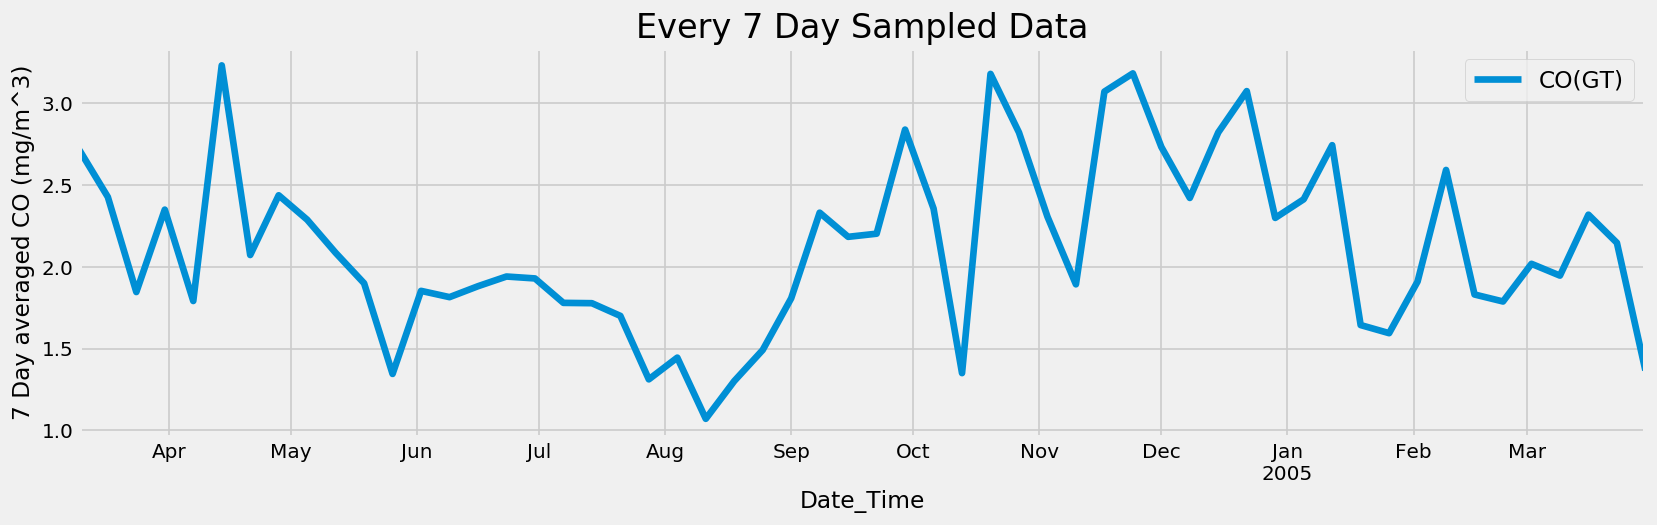

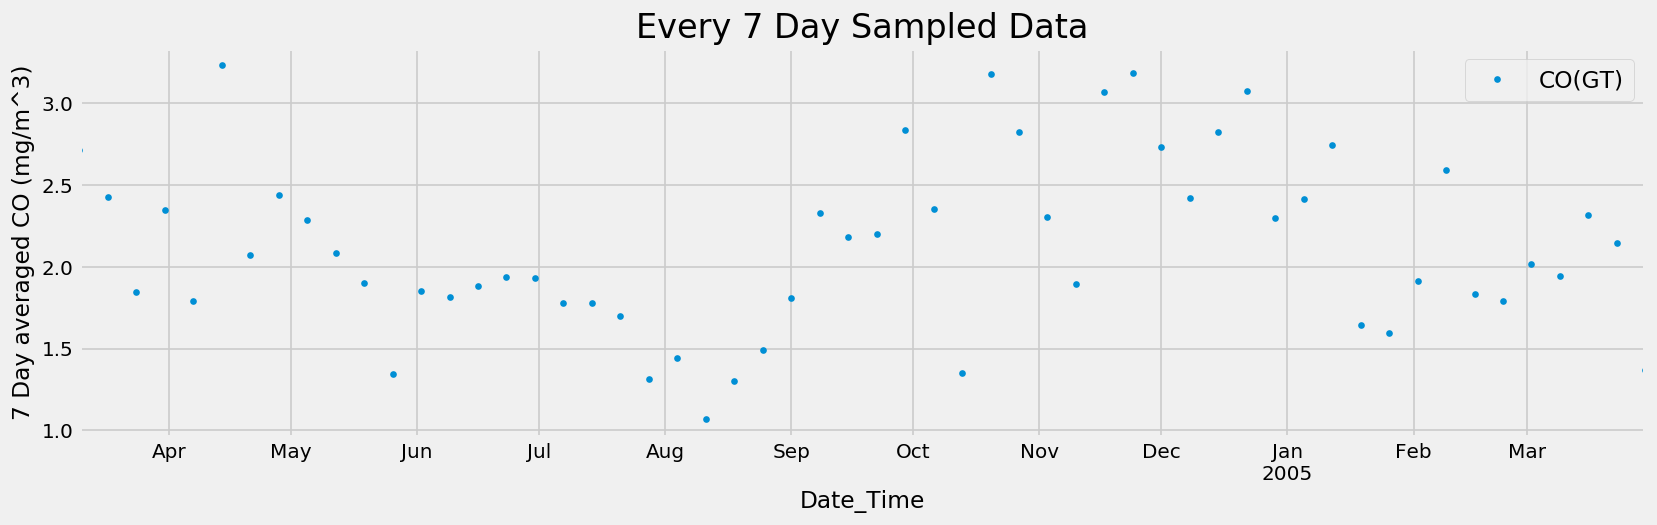

In [286]:
#### Let's plot Every 7 Days sampled data:

## Figure 1:
df_7Days.plot(figsize=(15,4))
plt.title("Every 7 Day Sampled Data")
plt.title("Every 7 Day Sampled Data")
plt.xlabel("Date_Time")
plt.ylabel("7 Day averaged CO (mg/m^3)")

## Figure 2:
df_7Days.plot(y=['CO(GT)'], style='.',figsize=(15,4))
plt.title("Every 7 Day Sampled Data")
plt.title("Every 7 Day Sampled Data")
plt.xlabel("Date_Time")
plt.ylabel("7 Day averaged CO (mg/m^3)")

# Auto ARIMA in Python

In [318]:
####### Step 1: Check if time series is Stationary or not.

## using the Augmented Dickey Fuller test (adfuller()), from the statsmodels package.

# The null hypothesis of the ADF test is that the time series is non-stationary. 
# So, if the p-value of the test is less than the significance level (0.05) then 
# we reject the null hypothesis and infer that the time series is indeed stationary.

from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df['CO(GT)'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

### Interpretation of Augmented Dickey Fuller test (ADF).
# As the p value is less than 0.05, we reject the null hypothesis and infer that the time series is stationary. 
# Therefore no differencing is needed and we can consider d=0.
# We need differencing only if the series is non-stationary.

ADF Statistic: -9.556031
p-value: 0.000000


Fit ARIMA: order=(1, 0, 1); AIC=17531.770, BIC=17559.553, Fit time=0.589 seconds
Fit ARIMA: order=(0, 0, 0); AIC=27518.010, BIC=27531.901, Fit time=0.003 seconds
Fit ARIMA: order=(1, 0, 0); AIC=18311.842, BIC=18332.679, Fit time=0.037 seconds
Fit ARIMA: order=(0, 0, 1); AIC=21205.289, BIC=21226.126, Fit time=0.167 seconds
Fit ARIMA: order=(2, 0, 1); AIC=17496.334, BIC=17531.062, Fit time=0.688 seconds
Fit ARIMA: order=(2, 0, 0); AIC=17518.837, BIC=17546.620, Fit time=0.070 seconds
Fit ARIMA: order=(2, 0, 2); AIC=17496.091, BIC=17537.765, Fit time=0.729 seconds
Fit ARIMA: order=(3, 0, 3); AIC=17297.455, BIC=17353.020, Fit time=3.100 seconds
Fit ARIMA: order=(2, 0, 3); AIC=17419.772, BIC=17468.391, Fit time=2.537 seconds
Fit ARIMA: order=(3, 0, 2); AIC=17403.629, BIC=17452.248, Fit time=1.958 seconds
Total fit time: 9.892 seconds
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 7674
Mo

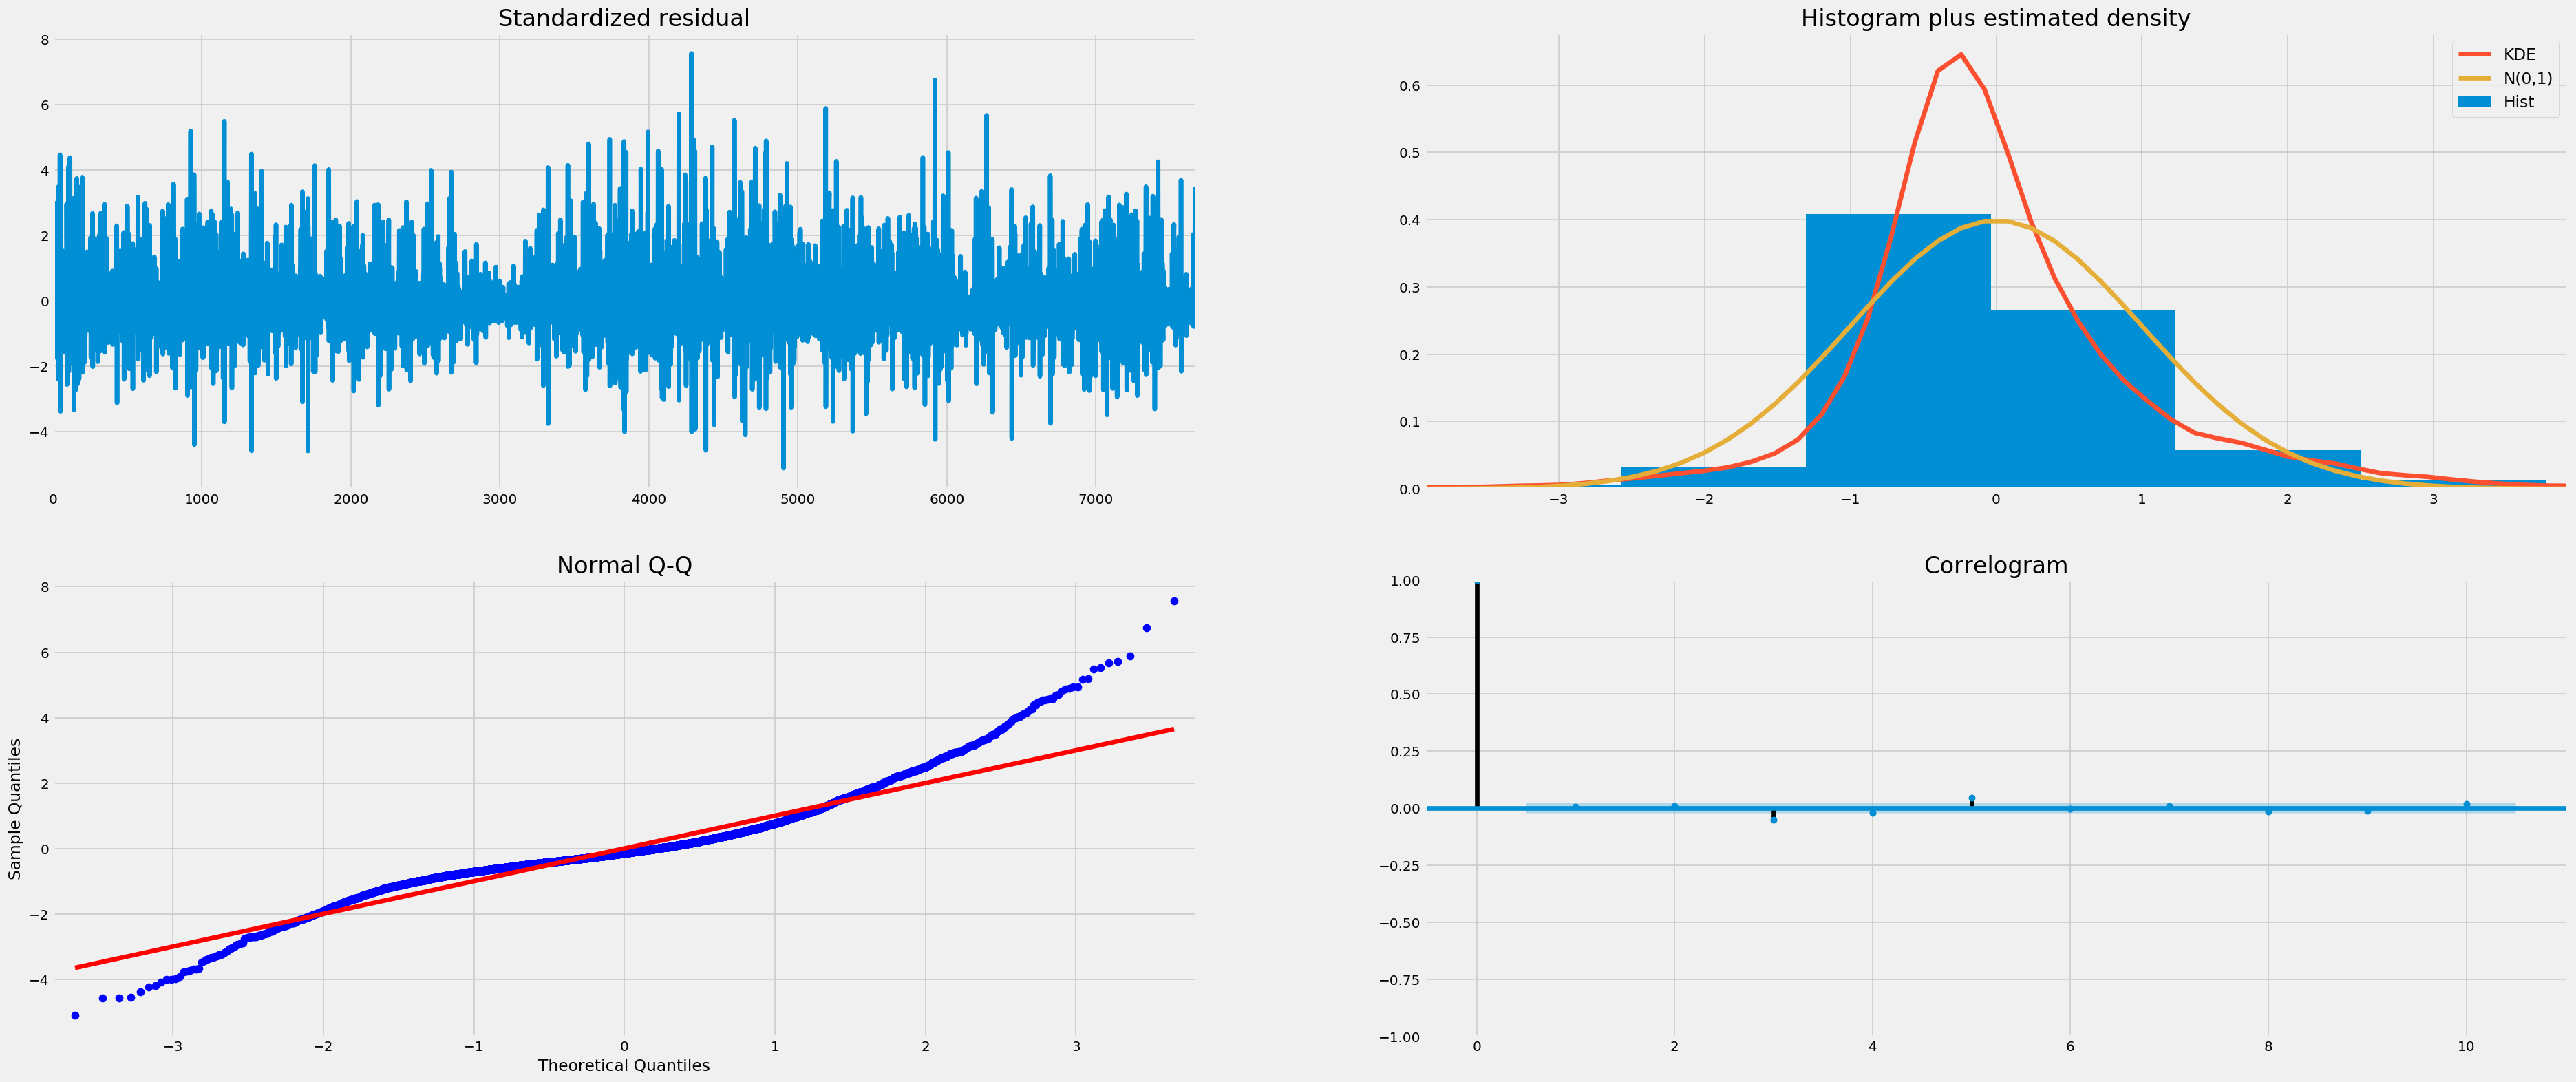

In [313]:
######################### Auto Arima Forecast in Python  ###############################


## Like R’s popular auto.arima() function, the pmdarima package provides auto_arima() with similar functionality.
## auto_arima() uses a stepwise approach to search multiple combinations of p,d,q parameters 
## and chooses the best model that has the least AIC.

### First install the pmdarima using following pip command:
### !pip install pmdarima


from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm


model = pm.auto_arima(df['CO(GT)'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())



## Interpret the residual plots in ARIMA model
## Let’s review the residual plots using stepwise_fit.

model.plot_diagnostics(figsize=(35,15))
plt.show()





In [314]:
# Find the optimal ARIMA model manually using Out-of-Time Cross validation:

# In Out-of-Time cross-validation, we take few steps back in time and forecast into 
# the future to as many steps you took back. 

# Then we compare the forecast against the actuals.

# To do out-of-time cross-validation, we need to create the training and 
# testing dataset by splitting the time series into 2 contiguous parts in approximately 75:25 ratio 
# or a reasonable proportion based on time frequency of series.

# We are not going to sample the training data randomly. 
# Because, the order sequence of the time series should be intact in order to use it for forecasting.

In [315]:
### Let's create the training and the testing set:

## Let's calculate the 75% sample size for the training data:
print("The sample size for the training data would be", len(df['CO(GT)'])*0.75,"Samples")



from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df['CO(GT)'][:5755]
test = df['CO(GT)'][5755:]

The sample size for the training data would be 5755.5 Samples


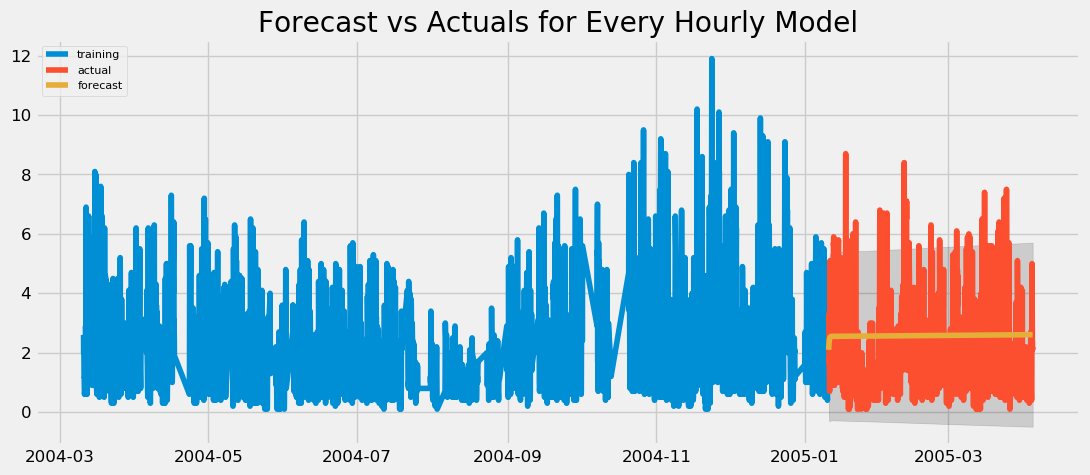

In [316]:
### Let's build the ARIMA model on training dataset, forecast and plot it.


# Build Model
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(1919, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals for Every Hourly Model')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [317]:
# Model's Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

{'mape': 1.437846616068427,
 'me': 0.5533753494644919,
 'mae': 1.2709613280136625,
 'mpe': 1.2785372585423163,
 'rmse': 1.4937648072164937,
 'acf1': 0.8299135146709756,
 'corr': -0.06654082019173094,
 'minmax': 0.4332953695846762}

# Auto Regressive Integrated Moving Average (ARIMA)

ARIMA is a class of models that ‘explains’ a given time series based on its own past values, that is, its own lags and the lagged forecast errors, so that equation can be used to forecast future values.

Any ‘non-seasonal’ time series that exhibits patterns and is not a random white noise can be modeled with ARIMA models.

An ARIMA model is characterized by 3 terms: p, d, q

where,
p is the order of the AR term
q is the order of the MA term
d is the number of differencing required to make the time series stationary

If a time series, has seasonal patterns, then you need to add seasonal terms and it becomes SARIMA, short for ‘Seasonal ARIMA’.


In [292]:
####### Step 1: Check if time series is Stationary or not.

## using the Augmented Dickey Fuller test (adfuller()), from the statsmodels package.

# The null hypothesis of the ADF test is that the time series is non-stationary. 
# So, if the p-value of the test is less than the significance level (0.05) then 
# we reject the null hypothesis and infer that the time series is indeed stationary.

from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df['CO(GT)'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

### Interpretation of Augmented Dickey Fuller test (ADF).
# As the p value is less than 0.05, we reject the null hypothesis and infer that the time series is stationary. 
# Therefore no differencing is needed and we can consider d=0.
# We need differencing only if the series is non-stationary.

ADF Statistic: -9.556031
p-value: 0.000000


IndexError: index 2 is out of bounds for axis 0 with size 2

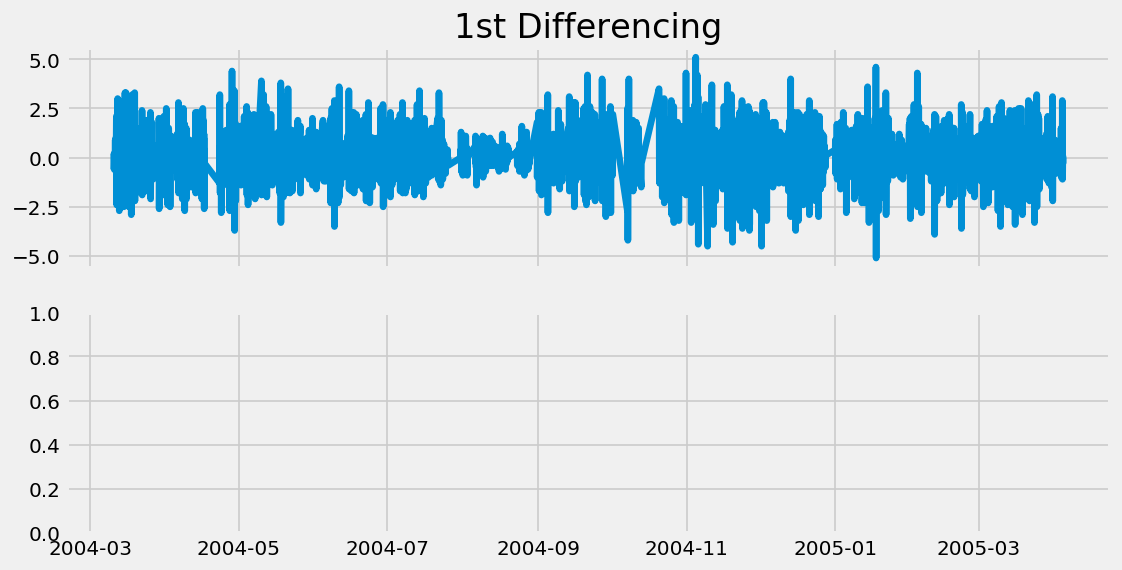

In [293]:
### Step 2: Find the order of the AR term (p)

# The next step is to identify if the model needs any AR terms. 
# We can find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot.


# PACF plot of 1st differenced series

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':120})
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(df['CO(GT)'].diff()); axes[0].set_title('1st Differencing')
axes[2].set(ylim=(0,1))
plot_pacf(df['CO(GT)'].diff().dropna(), ax=axes[2])
plt.show()

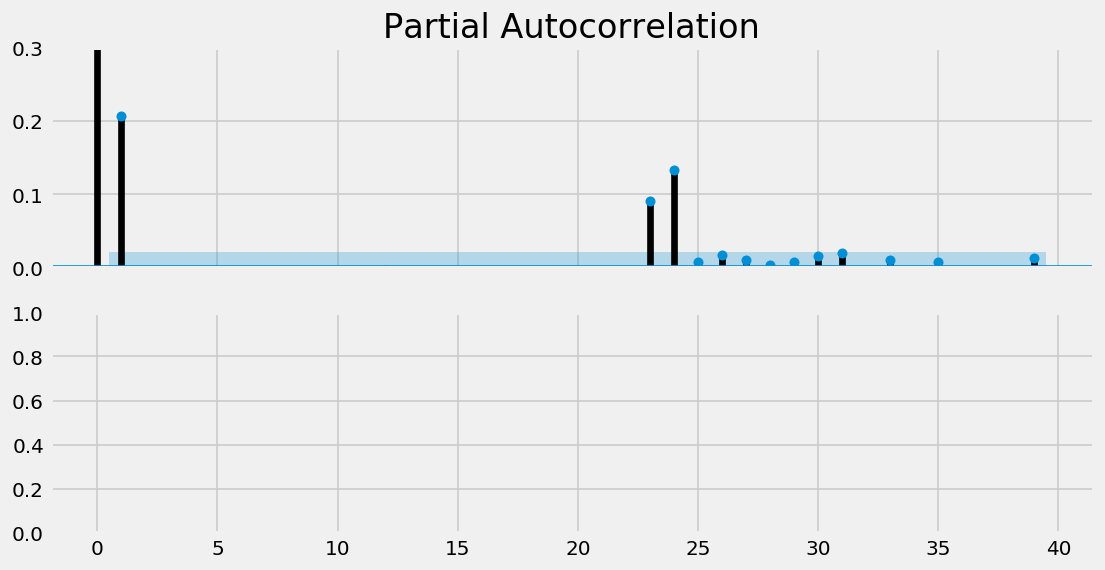

In [287]:
# Partial Autocorrelation Plot for AR term:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':120})

fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].set(ylim=(0,0.3))
plot_pacf(df['CO(GT)'].diff().dropna(), ax=axes[0])
plt.show()

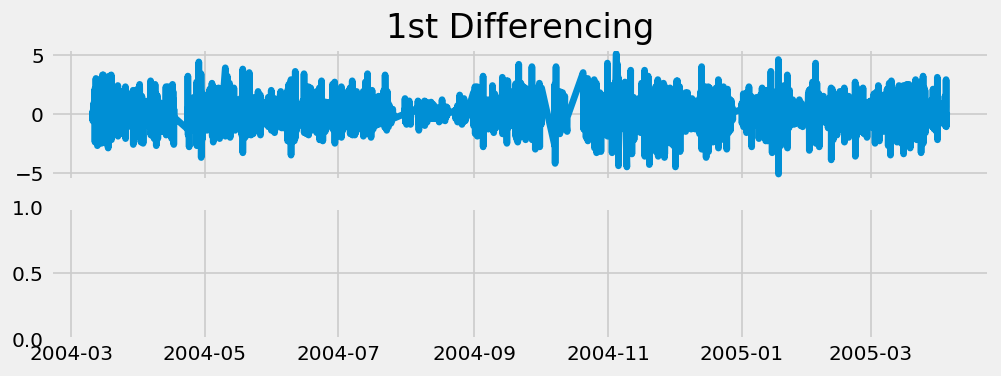

In [294]:
#### Step 3: Find the order of the MA term (q).

## We will look at the ACF plot for the number of MA (Q) terms.
## An MA term is technically, the error of the lagged forecast.
## The ACF tells how many MA terms are required to remove any autocorrelation in the stationarized series.
## Let’s see the autocorrelation plot of the differenced series.

import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})


fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(df['CO(GT)'].diff()); axes[0].set_title('1st Differencing')


plt.show()



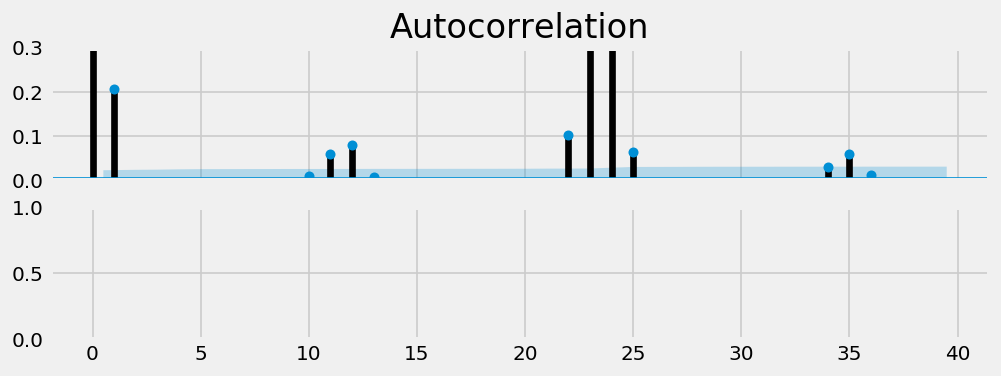

In [296]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(2, 1, sharex=True)

axes[0].set(ylim=(0,0.3))
plot_acf(df['CO(GT)'].diff().dropna(), ax=axes[0])

plt.show()


### Interpretation of Autocorrelation plot:
## Couple of lags are well above the significance line. 
## So, let’s tentatively fix q as 1. When in doubt, go with the simpler model that 
## sufficiently explains the Y.

In [299]:
### Let's build the ARIMA model: 
### As we have determined the values of p, d and q, we have everything needed to fit the ARIMA model. 
### Let’s use the ARIMA() implementation in statsmodels package.
### p=1, d=1, q=1
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df['CO(GT)'], order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:               D.CO(GT)   No. Observations:                 7673
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -9141.597
Method:                       css-mle   S.D. of innovations              0.796
Date:                Sun, 17 Nov 2019   AIC                          18291.194
Time:                        14:56:50   BIC                          18318.976
Sample:                             1   HQIC                         18300.723
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -7.641e-05      0.000     -0.431      0.667      -0.000       0.000
ar.L1.D.CO(GT)     0.8247      0.007    123.508      0.000       0.812       0.838
ma.L1.D.CO(GT)    -0.9967      0.001

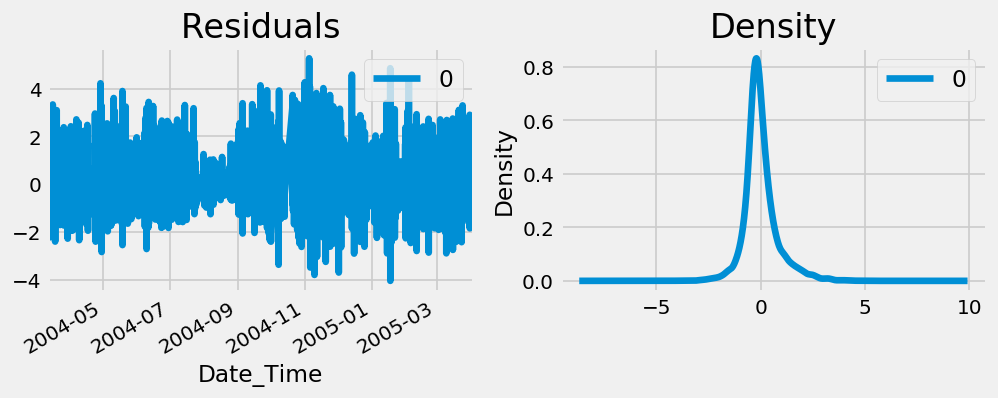

In [300]:
## Let’s plot the residuals to ensure there are no patterns 
## (i.e., look for constant mean and variance).

# Plot residual errors

residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

## The residual errors seem fine with near zero mean and uniform variance. 
## Let’s plot the actuals against the fitted values using plot_predict().

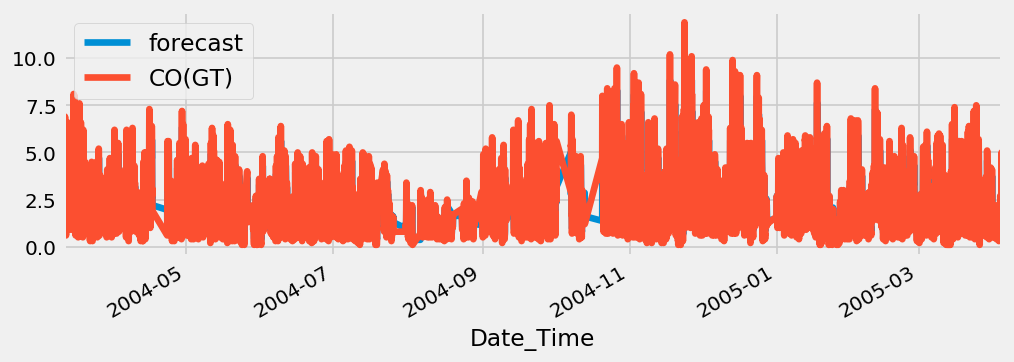

In [301]:
## Let’s plot the actuals against the fitted values using plot_predict().
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [302]:
### Interpretation of the above graph:

# When we set dynamic=False the in-sample lagged values are used for prediction.
# That means, the model gets trained up until the previous value to make the next prediction. 
# This can make the fitted forecast and actuals look artificially good.

# So, we seem to have a decent ARIMA model. But is that the best?

# We can't say that at this point because we haven’t actually forecasted into the future and 
# compared the forecast with the actual performance.
# Therefore, the real validation you need now is the Out-of-Time cross-validation.

In [303]:
# Find the optimal ARIMA model manually using Out-of-Time Cross validation:

# In Out-of-Time cross-validation, we take few steps back in time and forecast into 
# the future to as many steps you took back. 

# Then we compare the forecast against the actuals.

# To do out-of-time cross-validation, we need to create the training and 
# testing dataset by splitting the time series into 2 contiguous parts in approximately 75:25 ratio 
# or a reasonable proportion based on time frequency of series.

# We are not going to sample the training data randomly. 
# Because, the order sequence of the time series should be intact in order to use it for forecasting.

In [304]:
### Let's create the training and the testing set:

## Let's calculate the 75% sample size for the training data:
print("The sample size for the training data would be", len(df['CO(GT)'])*0.75,"Samples")



from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df['CO(GT)'][:5755]
test = df['CO(GT)'][5755:]

The sample size for the training data would be 5755.5 Samples


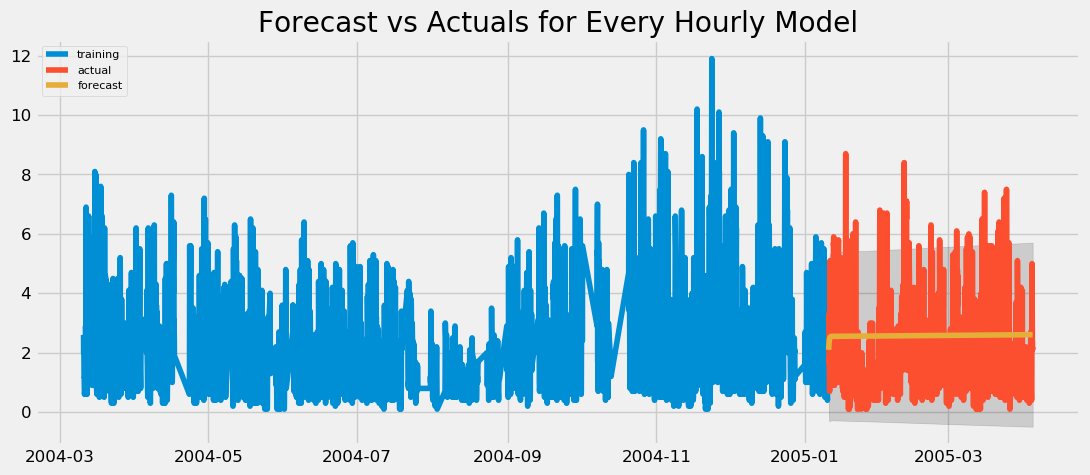

In [311]:
### Let's build the ARIMA model on training dataset, forecast and plot it.


# Build Model
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(1919, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals for Every Hourly Model')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [310]:
# Model's Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

{'mape': 1.437846616068427,
 'me': 0.5533753494644919,
 'mae': 1.2709613280136625,
 'mpe': 1.2785372585423163,
 'rmse': 1.4937648072164937,
 'acf1': 0.8299135146709756,
 'corr': -0.06654082019173094,
 'minmax': 0.4332953695846762}

# Auto ARIMA in Python

Fit ARIMA: order=(1, 0, 1); AIC=17531.770, BIC=17559.553, Fit time=0.509 seconds
Fit ARIMA: order=(0, 0, 0); AIC=27518.010, BIC=27531.901, Fit time=0.003 seconds
Fit ARIMA: order=(1, 0, 0); AIC=18311.842, BIC=18332.679, Fit time=0.025 seconds
Fit ARIMA: order=(0, 0, 1); AIC=21205.289, BIC=21226.126, Fit time=0.163 seconds
Fit ARIMA: order=(2, 0, 1); AIC=17496.334, BIC=17531.062, Fit time=0.652 seconds
Fit ARIMA: order=(2, 0, 0); AIC=17518.837, BIC=17546.620, Fit time=0.054 seconds
Fit ARIMA: order=(2, 0, 2); AIC=17496.091, BIC=17537.765, Fit time=0.747 seconds
Fit ARIMA: order=(3, 0, 3); AIC=17297.455, BIC=17353.020, Fit time=3.036 seconds
Fit ARIMA: order=(2, 0, 3); AIC=17419.772, BIC=17468.391, Fit time=2.418 seconds
Fit ARIMA: order=(3, 0, 2); AIC=17403.629, BIC=17452.248, Fit time=1.795 seconds
Total fit time: 9.414 seconds
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 7674
Mo

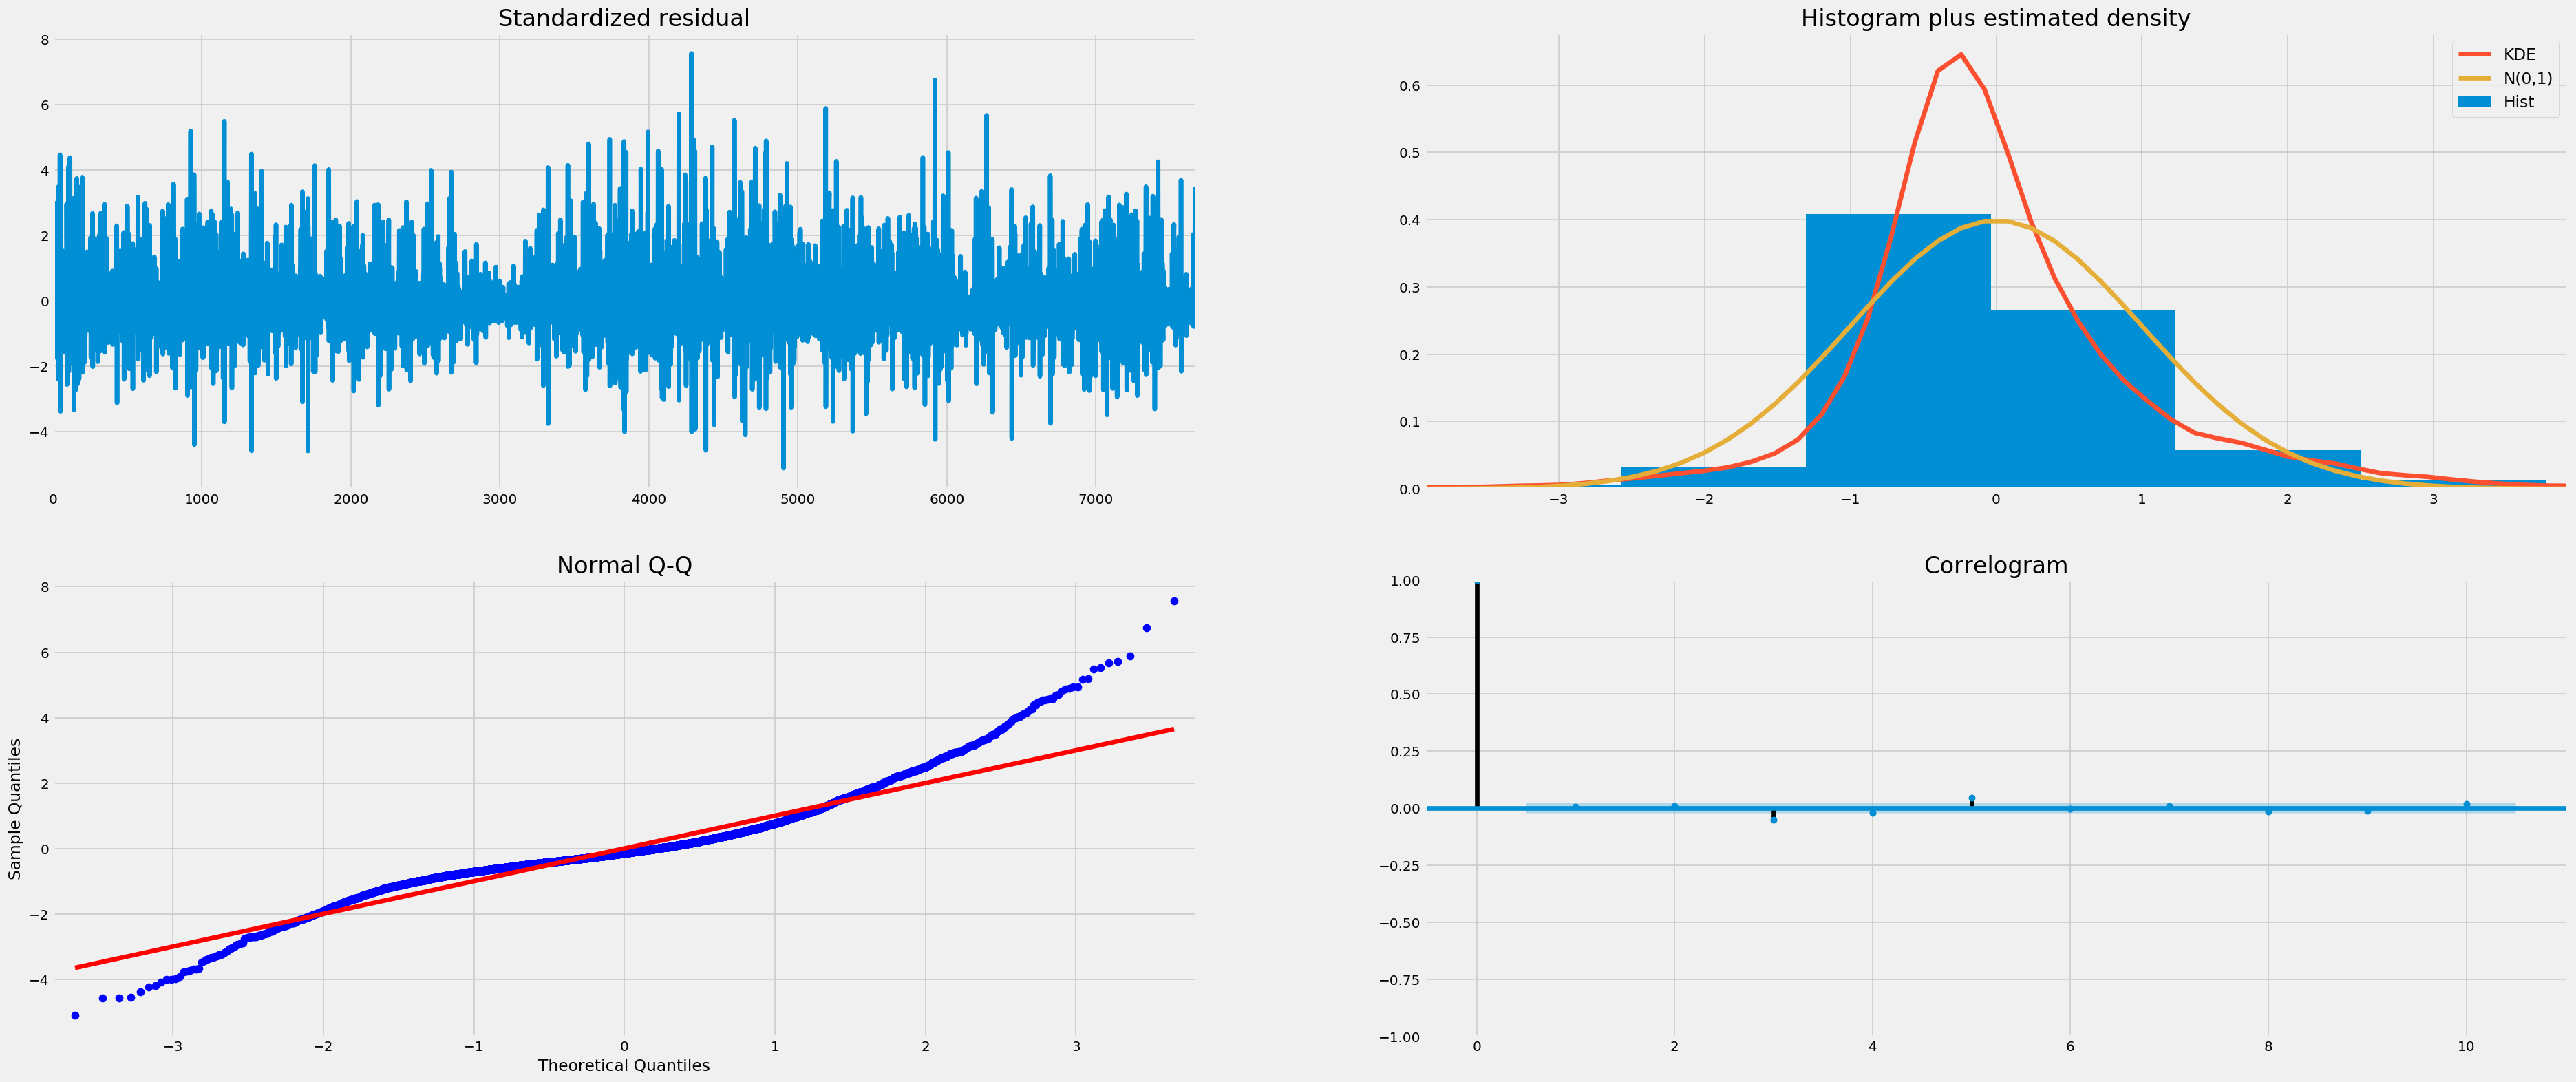

In [307]:
######################### Auto Arima Forecast in Python  ###############################


## Like R’s popular auto.arima() function, the pmdarima package provides auto_arima() with similar functionality.
## auto_arima() uses a stepwise approach to search multiple combinations of p,d,q parameters 
## and chooses the best model that has the least AIC.

### First install the pmdarima using following pip command:
### !pip install pmdarima


from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm


model = pm.auto_arima(df['CO(GT)'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())



## Interpret the residual plots in ARIMA model
## Let’s review the residual plots using stepwise_fit.

model.plot_diagnostics(figsize=(35,15))
plt.show()





In [258]:

# Interpret the above plot diagnostics:

#### Top left: 
# The residual errors seem to fluctuate around a mean of zero and have a uniform variance.



#### Top Right: 
# The density plot suggest normal distribution with mean around zero.



#### Bottom left: 
# All the dots should fall perfectly in line with the red line. 
# Any significant deviations would imply the distribution is skewed.



#### Bottom Right: 
# The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. 
# Any autocorrelation would imply that there is some pattern in the residual errors 
#which are not explained in the model. So you will need to look for more X’s (predictors) to the model.

# Overall, it seems to be a good fit. Let’s forecast.

In [308]:
# Forecast
n_periods = 2500
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df['CO(GT)']), len(df['CO(GT)'])+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df['CO(GT)'])
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of CO(GT)")
plt.show()

ValueError: view limit minimum -28544.32916666667 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 1080x360 with 1 Axes>